In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

회귀 vs 분류 -> 종속변수(예측하고자 하는 값)가 숫자면 -> 회귀 / 범주형 -> 분류

## 실습. 비용(cost) 최소화하는 회귀모델 구하기

### 예제 데이터 생성

- y=6+4X+noise

In [2]:
np.random.seed(0)

# y= 4x+6 식을 근사
x= 2*np.random.rand(100,1)
y= 6+4*x + np.random.randn(100,1)
print(x.shape, y.shape)

(100, 1) (100, 1)


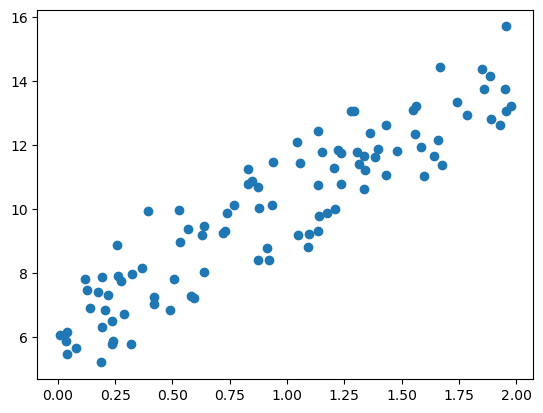

In [3]:
plt.scatter(x,y)
plt.show()

### 1. 경사하강법(Gradient Descent)을 이용한 회귀모델 구하기

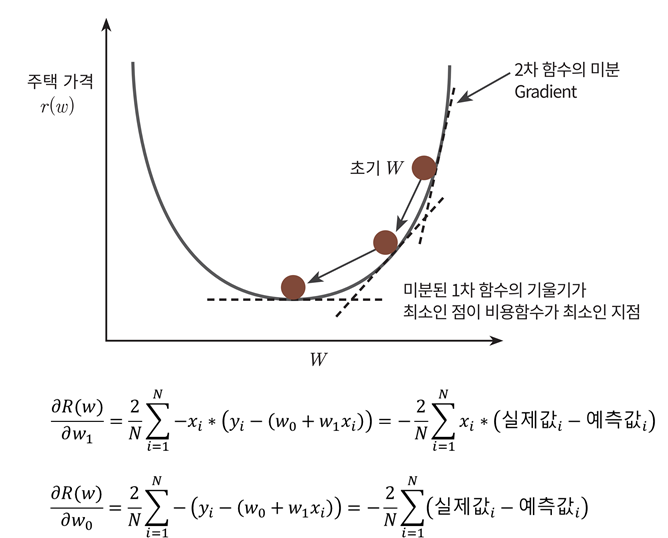

### 경사하강법의 일반적인 프로세스

- [Step1]  $ w_0 , w_1 $를 임의의 값으로 설정하고 첫 비용함수의 값을 계산한다


- [Step2]  $ w_1 $를 $ w_1 + η \frac {2}{N} \sum_{i=1}^N x_i *(실제값_i - 예측값_i ) $ 으로 $ w_0 $를 $ w_0 + η \frac {2}{N} \sum_{i=1}^N (실제값_i - 예측값_i ) $ 으로 업데이트 한 후 다시 비용함수의 값을 계산한다.


- [Step3]  비용함수의 값이 감소했으면 다시 Step2를 반복한다. 더 이상 비용 함수의 값이 감소하지 않으면 그 때의 $ w_1, w_0 $를 구하고 반복을 중지한다.

#### $w_0$과 $w_1$의 값 업데이트 함수 `get_weight_updates()` 정의
- 경사하강법을 적용하여 업데이트

In [13]:
def get_weight_updates(w1, w0,x,y,learning_rate=0.01):
    N = len(y)
    # np.zeros_like(객체) -> 객체 shape만큼 0으로 채우기 
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)

    y_pred = np.dot(x,w1.T) + w0   # 예측값
    diff = y - y_pred              # 오차

    w0_factors = np.ones((N,1))

    w1_update = -(2/N)*learning_rate*(np.dot(x.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

    return w1_update, w0_update

In [6]:
np.dot(x.T, np.ones((100,1)))

array([[94.5587679]])

- 임의의 초기값을 주어 첫번째 w0, w1 계산

In [8]:
w0 = np.zeros((1,1))
w1 = np.zeros((1,1))

y_pred = np.dot(x,w1.T) + w0
diff = y - y_pred
print(y_pred, diff)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]] [[ 9.22535819]
 [12.62234142]
 [11.28776945]
 [ 8.82282178]
 [10.87749059]
 [13.06304208]
 [10.67947726]
 [12.95425917]
 [12.63854946]
 [10.12198388]
 [11.93062336]
 [11.45360443]
 [10.75263147]
 [14.38141214]
 [ 6.92465486]
 [ 7.40360757]
 [ 6.1722472 ]
 [14.44682926]
 [12.3521661 ]
 [13.36208655]
 [15.71209743]
 [11.04550945]
 [ 8.4213499 ]
 [13.21363012]
 [ 5.773072  ]
 [13.06298936]
 [ 6.7332

#### `gradient_descent_steps()` 함수 정의
- 경사 하강법을 이용
- get_weight_updates()를 호출하여 $w_1$과 $w_0$를 반복적으로 업데이트

In [14]:
def gradient_descent_steps(x,y,iters=10000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    for _ in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, x,y,learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    return w1, w0

In [15]:
gradient_descent_steps(x,y,iters=10000)

(array([[3.96846751]]), array([[6.22215108]]))

#### 예측 오차 비용 계산 함수 `get_cost()` 생성

In [16]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

#### 경사하강법 실행

In [31]:
w1, w0 = gradient_descent_steps(x,y,iters=10000)
print(f'w1={w1[0,0]:.4f}, w0={w0[0,0]:.4f}')

y_pred = w1[0,0] * x + w0[0,0]
print(f"cost: {get_cost(y, y_pred):.4f}")

w1=3.9685, w0=6.2222
cost: 0.9924


#### 경사하강법으로 구한 선형회귀식 시각화

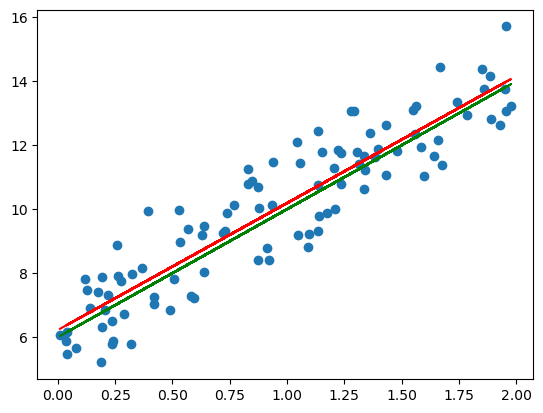

In [23]:
yo = 4*x+6
plt.scatter(x,y)
plt.plot(x,y_pred,'r')
plt.plot(x, yo,'g')
plt.show()

### 2. 미니배치 확률적 경사 하강법(Stochastic Gradient Descent)이용한 회귀모델

**미니 배치 확률적 경사하강법 함수 `stochastic_gradient_descent_steps()` 정의**
- batch_size 만큼 데이터를 랜덤하게 추출하여 이를 기반으로 w1_update, w0_update를 계산

In [24]:
def stochastic_gradient_descent_steps(x,y,batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    for n in range(iters):
        np.random.seed(n)
        sto_rnd_idx = np.random.permutation(x.shape[0])
        sample_x = x[sto_rnd_idx[0:batch_size]]
        sample_y = y[sto_rnd_idx[0:batch_size]]
        w1_update, w0_update = get_weight_updates(w1,w0, sample_x, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

In [27]:
np.random.seed(0)
np.random.permutation(10)

array([2, 8, 4, 9, 1, 6, 7, 3, 0, 5])

#### 미니배치 경사하강법을 사용한 회귀모델

In [32]:
w1, w0 = stochastic_gradient_descent_steps(x,y,iters=10000)
print(f'w1={w1[0,0]:.4f}, w0={w0[0,0]:.4f}')

y_pred_sto = w1[0,0] * x + w0[0,0]
print(f"Stochastic GD Cost: {get_cost(y, y_pred):.4f}")

w1=3.9876, w0=6.2441
Stochastic GD Cost: 0.9924


**확률적 경사하강법으로 계산된 회귀계수를 적용한 회귀직선 시각화**

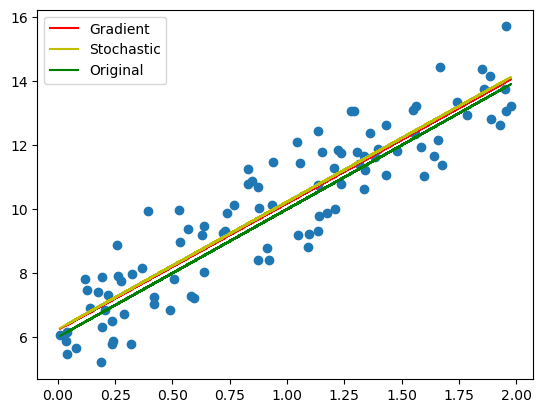

In [34]:
yo = 4*x+6
plt.scatter(x,y)
plt.plot(x,y_pred,'r', label='Gradient')
plt.plot(x,y_pred_sto,'y', label='Stochastic')
plt.plot(x, yo,'g', label='Original')
plt.legend()
plt.show()

### 3.  OLS정규방정식을 이용한 회귀계수 추정

$\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$

In [35]:
# np.c_ -> np.concatenate
x_b = np.c_[np.ones((100,1)), x]
x_b.shape

(100, 2)

In [37]:
theta_hat = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
print(theta_hat)
theta_hat.shape

[[6.22215108]
 [3.96846751]]


(2, 1)

$\hat{y} = \mathbf{X} \boldsymbol{\hat{\theta}}$

In [38]:
x_new = np.array([[0],[2]])
x_new_b = np.c_[np.ones((2,1)), x_new]
y_predict = x_new_b.dot(theta_hat)
y_predict

array([[ 6.22215108],
       [14.1590861 ]])

#### 정규방정식을 사용한 회귀모델 시각화

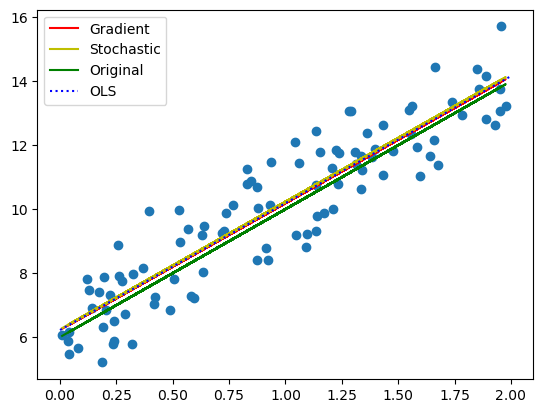

In [39]:
yo = 4*x+6
plt.scatter(x,y)
plt.plot(x,y_pred,'r', label='Gradient')
plt.plot(x,y_pred_sto,'y', label='Stochastic')
plt.plot(x, yo,'g', label='Original')
plt.plot(x_new, y_predict,'b:', label='OLS')
plt.legend()
plt.show()

### 4. 사이킷런의  LinearRegression 클래스 사용

- http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

- RSS(Residual SUm of Squares)를 최소화하는 OLS(Ordinary Least Squares) 추정 방식으로 구현한 클래스
- fit() 메서드로 X, y 배열을 입력받으면 회귀계수 W를 coef_ , intercept_ 속성에 저장
    - coef_ : 회귀계수 $w_i$ 값들
    - intercept_ : intercept 값 (절편)

#### LinearRegression 객체 생성 및 학습

In [40]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

#### X=1.5248값 예측

In [41]:
pred = lr.predict(np.array([[1.5248]]))
pred

array([[12.27327034]])

#### 회귀계수 coef_ 속성

In [42]:
lr.coef_

array([[3.96846751]])

#### 절편 intercept_ 속성

In [45]:
lr.intercept_

array([6.22215108])

#### 회귀모델 시각화

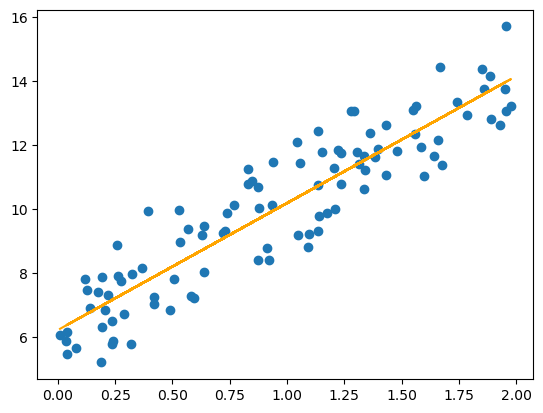

In [51]:
plt.scatter(x,y)
plt.plot(x, lr.predict(x),'orange', label='OLS')
plt.show()

#### 경사하강법,OLS정규방정식, 사이킷런 모델 적용한 결과 비교

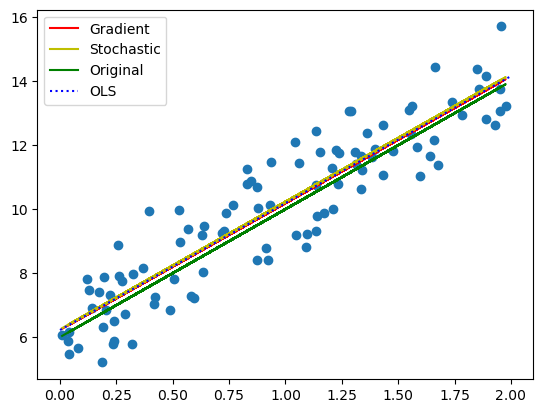

In [49]:
yo = 4*x+6
plt.scatter(x,y)
plt.plot(x,y_pred,'r', label='Gradient')
plt.plot(x,y_pred_sto,'y', label='Stochastic')
plt.plot(x, yo,'g', label='Original')
plt.plot(x_new, y_predict,'b:', label='OLS')
plt.legend()
plt.show()

---------------------------------------------